# Final Project Exploratory Analysis
Melissa Medeiros - October 8, 2018

## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import datetime as dt

plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default chart size for notebook

# Import and clean the data sets
There is a time series for chickenpox, measles and mumps

In [2]:
chickenpox = pd.read_csv('nyc_chickenpox.csv', converters={'Month':pd.to_datetime})
chickenpox.columns = ['month','chickenpox']

measles = pd.read_csv('nyc_measles.csv', converters={'Month':pd.to_datetime})
measles.columns = ['month','measles']

mumps = pd.read_csv('nyc_mumps.csv', converters={'Month':pd.to_datetime})
mumps.columns = ['month','mumps']

In [3]:
print('Chickenpox start: {}, end: {}'.format(chickenpox.month[0], chickenpox.month[len(chickenpox)-1]))
print('Measles start: {}, end: {}'.format(measles.month[0], measles.month[len(measles)-1]))
print('Mumps start: {}, end: {}'.format(mumps.month[0], mumps.month[len(mumps)-1]))

Chickenpox start: 1931-01-01 00:00:00, end: 1972-06-01 00:00:00
Measles start: 1928-01-01 00:00:00, end: 1972-06-01 00:00:00
Mumps start: 1928-01-01 00:00:00, end: 1972-06-01 00:00:00


## Combine the data sets 
All three time series end June 1972, but measles/mumps start before chickenpox

In [4]:
data = measles.merge(mumps.merge(chickenpox, how='left'), how='left')
data.head()

,month,measles,mumps,chickenpox
0,1928-01-01,609,124,NaN
1,1928-02-01,1516,132,NaN
2,1928-03-01,4952,193,NaN
3,1928-04-01,7466,144,NaN
4,1928-05-01,11155,195,NaN


In [5]:
data.tail() # note: chickenpox has been converted to a float since it now includes NaN values

,month,measles,mumps,chickenpox
529,1972-02-01,35,157,463.0
530,1972-03-01,40,219,690.0
531,1972-04-01,31,221,847.0
532,1972-05-01,41,264,1121.0
533,1972-06-01,32,298,1048.0


## Save 1971 and beyond as the 'future'
We will ignore this for all our EDA (and future training / testing)

In [6]:
the_future = data[data.month>='1971-1-1']
data = data[data.month<'1971-1-1']

In [7]:
data.tail()

,month,measles,mumps,chickenpox
511,1970-08-01,39,147,137.0
512,1970-09-01,40,104,58.0
513,1970-10-01,52,90,134.0
514,1970-11-01,58,77,71.0
515,1970-12-01,143,122,142.0


# EDA

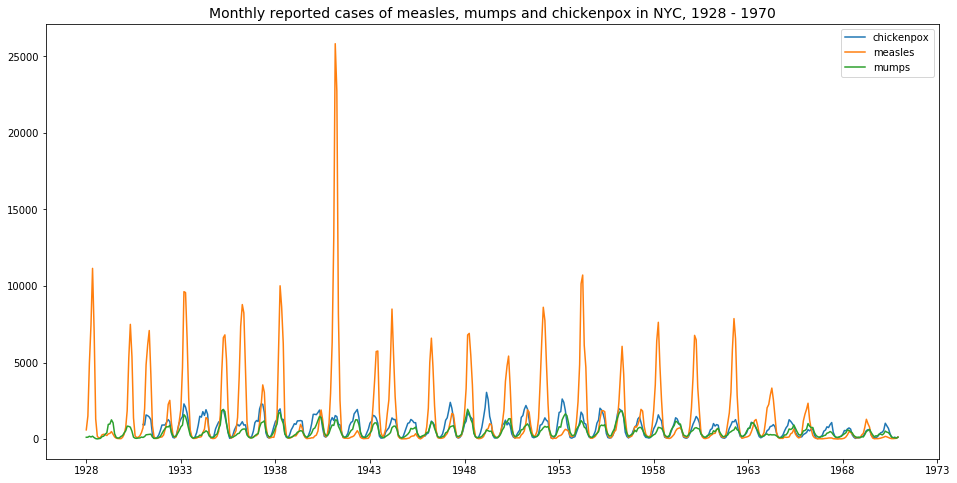

In [8]:
# Plot all the series - measles are clearly on a different scale
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of measles, mumps and chickenpox in NYC, 1928 - 1970', fontsize=14)
plt.plot(data.month, data[['chickenpox','measles','mumps']])
plt.legend(['chickenpox','measles','mumps'])
plt.show()

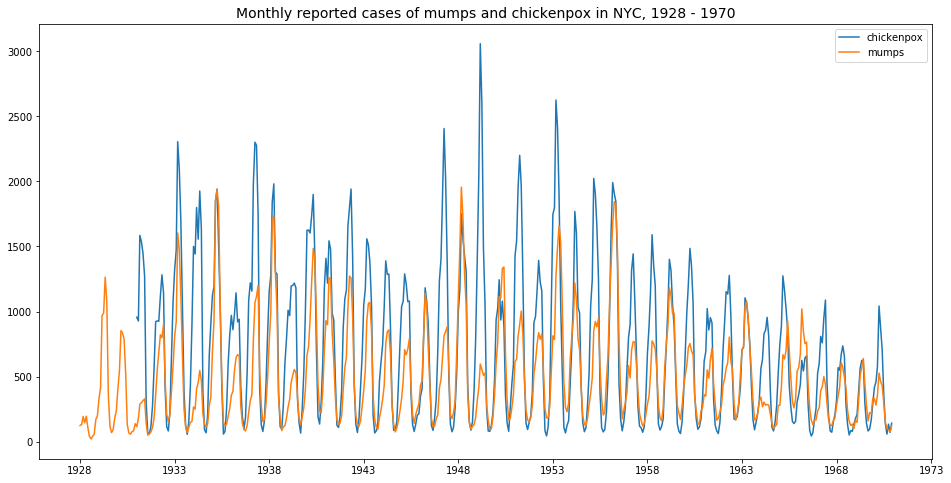

In [9]:
# Plot mumps and chickenpox - measles are obscuring these
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of mumps and chickenpox in NYC, 1928 - 1970', fontsize=14)
plt.plot(data.month, data[['chickenpox','mumps']])
plt.legend(['chickenpox','mumps'])
plt.show()

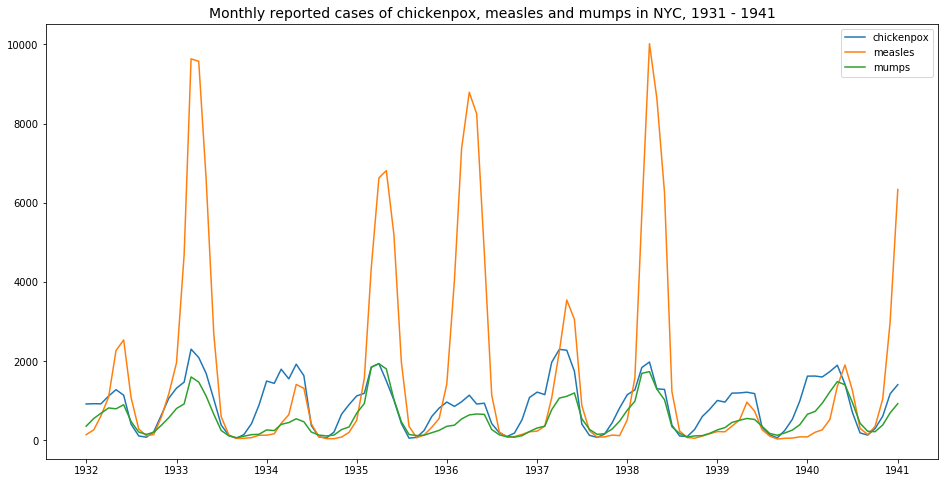

In [10]:
# Plot all three over a shorter time period
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of chickenpox, measles and mumps in NYC, 1931 - 1941', fontsize=14)
plt.plot(data.month[48:157], data[['chickenpox','measles','mumps']][48:157]) 
plt.legend(['chickenpox','measles','mumps'])
plt.show()

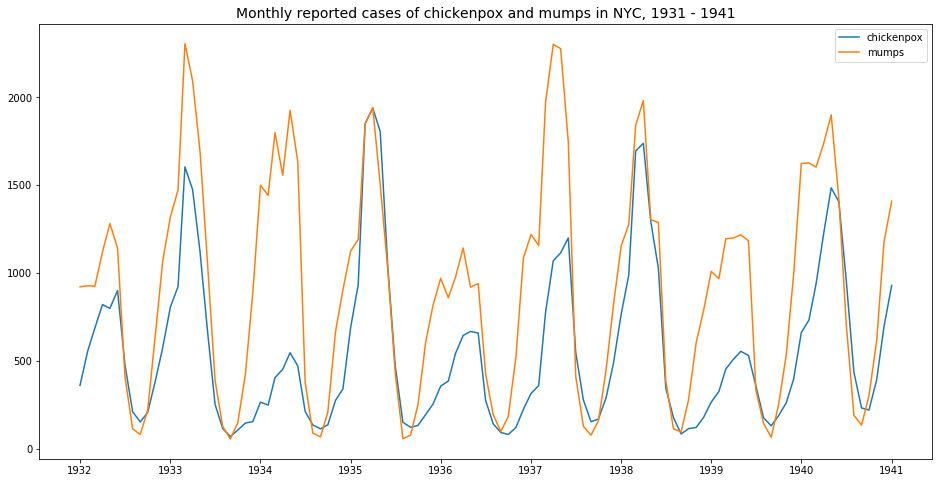

In [11]:
# Plot mumps + chickenpox over a shorter time period
#plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of chickenpox and mumps in NYC, 1931 - 1941', fontsize=14)
plt.plot(data.month[48:157], data.mumps[48:157])  
plt.plot(data.month[48:157], data.chickenpox[48:157])  
plt.legend(['chickenpox','mumps'])
plt.show()

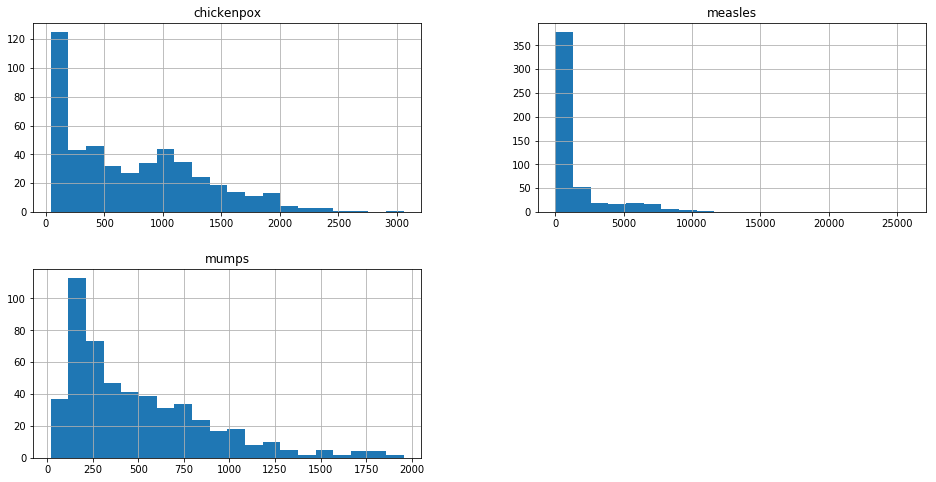

In [12]:
# See the distributions of each
data.hist(bins=20)#, figsize=(12,8))
plt.show()

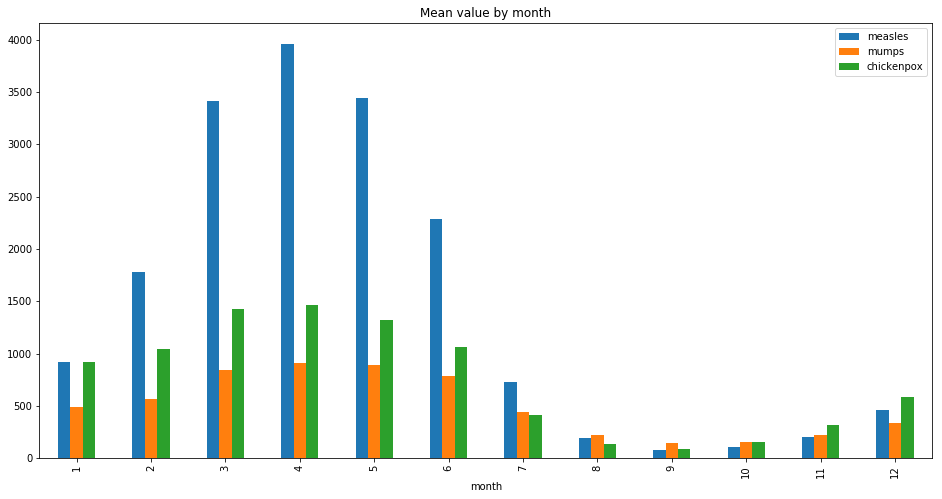

In [13]:
# There is clearly a seasonal pattern - monthly
data.groupby(data.month.dt.month).mean().plot(kind='bar')
plt.title('Mean value by month')
plt.show()

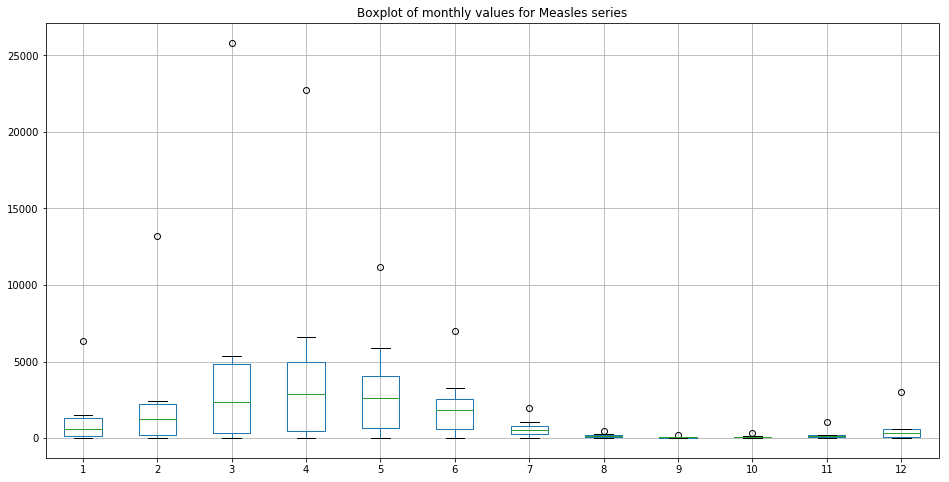

In [14]:
data.groupby(data.month.dt.month).measles.describe().T.boxplot()#figsize=(12,8))
plt.title('Boxplot of monthly values for Measles series')
plt.show()

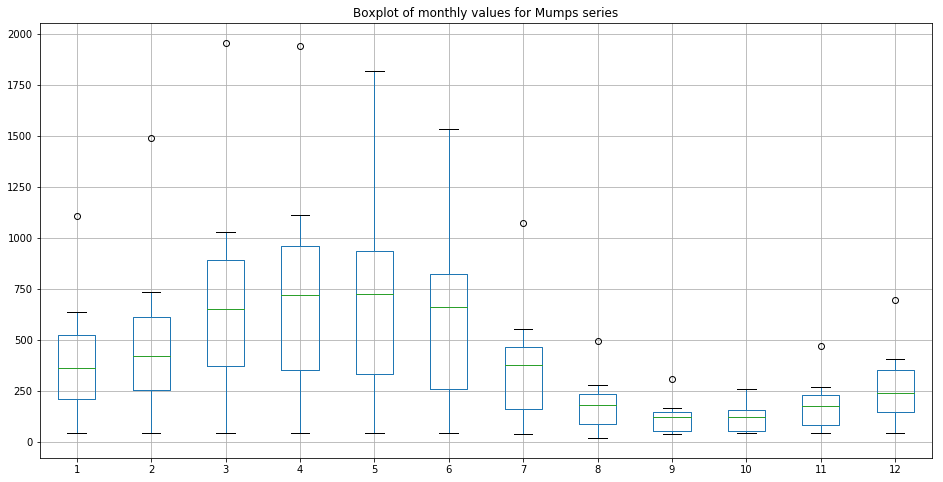

In [15]:
data.groupby(data.month.dt.month).mumps.describe().T.boxplot()#figsize=(12,8))
plt.title('Boxplot of monthly values for Mumps series')
plt.show()

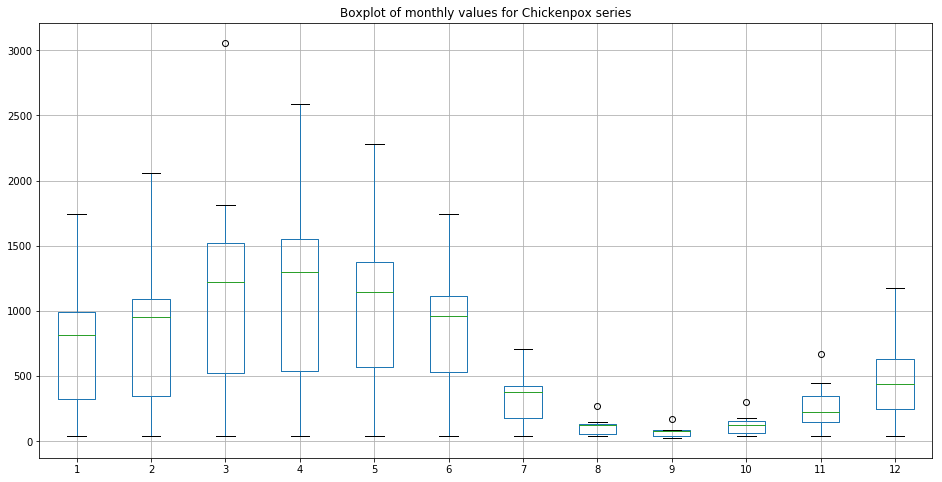

In [16]:
data.groupby(data.month.dt.month).chickenpox.describe().T.boxplot()#figsize=(12,8))
plt.title('Boxplot of monthly values for Chickenpox series')
plt.show()

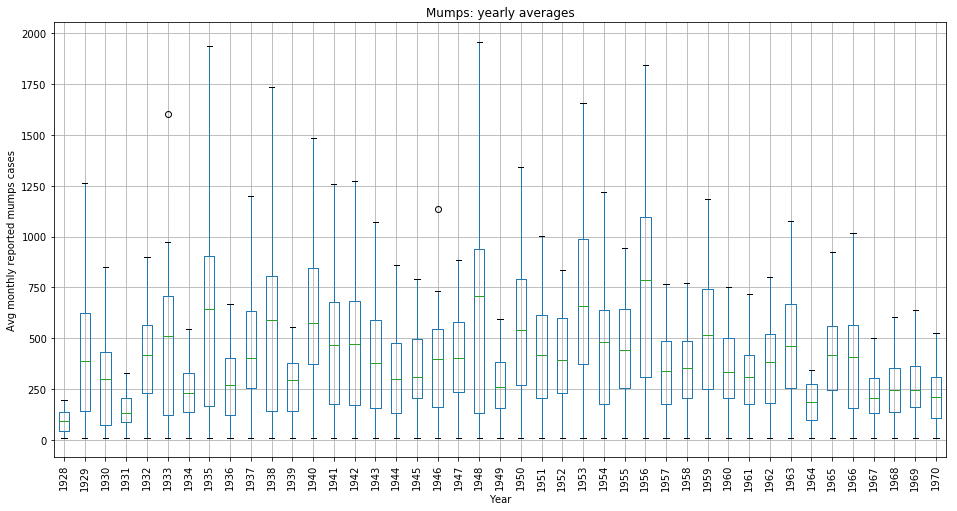

In [17]:
# look at yearly avg values - mumps example
data.groupby(data.month.dt.year).mumps.describe().T.boxplot()
plt.title('Mumps: yearly averages')
plt.ylabel('Avg monthly reported mumps cases')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

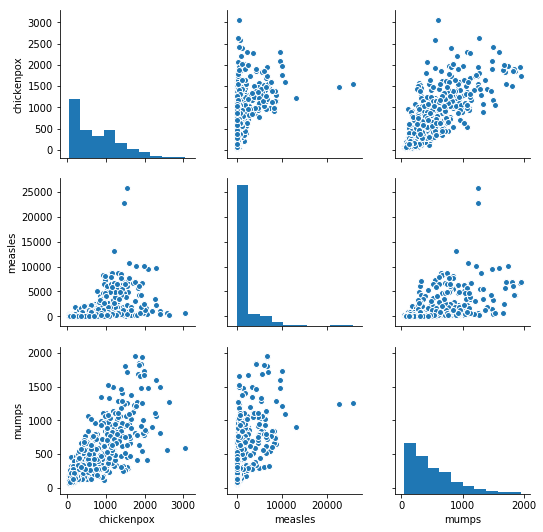

In [19]:
# are the series correlated with each other? - mumps and chickenpox appear to be correlated
# measles has some outliers
sns.pairplot(data.dropna()[['chickenpox','measles','mumps']])
plt.show()

In [20]:
data.dropna()[['chickenpox','measles','mumps']].corr()

,chickenpox,measles,mumps
chickenpox,1.000000,0.454494,0.757273
measles,0.454494,1.000000,0.543733
mumps,0.757273,0.543733,1.000000


## Time Series Analysis
- A closer look at the mumps series

In [21]:
mumps_series = data[['month','mumps']].set_index('month')

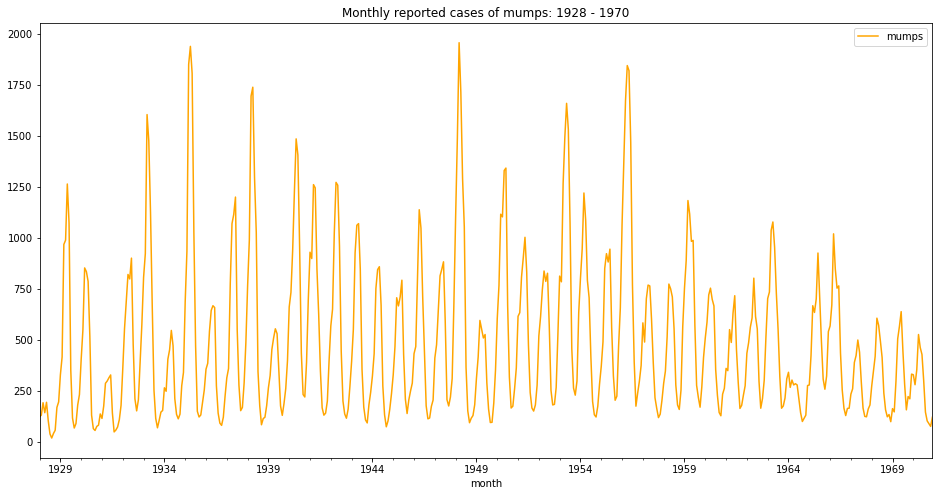

In [22]:
# Look at the series
mumps_series.plot(color='orange')
plt.title('Monthly reported cases of mumps: 1928 - 1970')
plt.show()

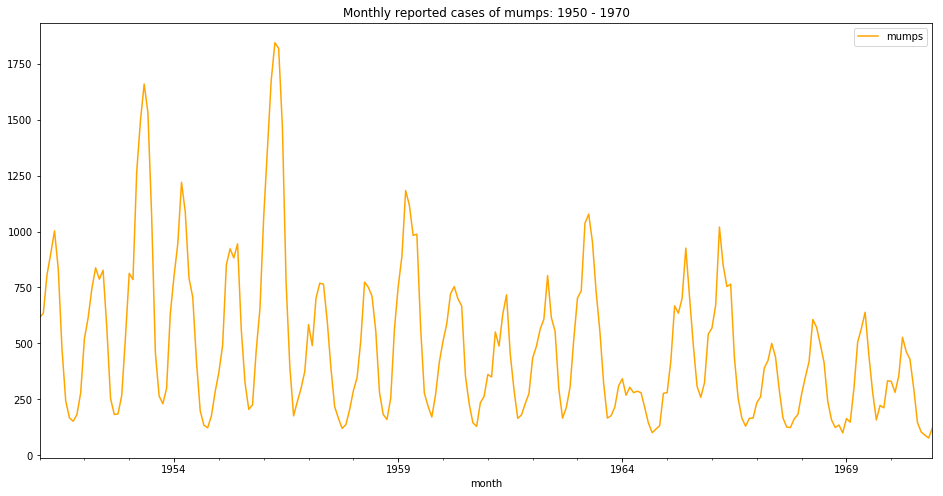

In [23]:
# zoom in on last 20 years
mumps_series[-240:].plot(color='orange')
plt.title('Monthly reported cases of mumps: 1950 - 1970')
plt.show()

### Time series components
Time series are often composed of:
- Trend: increasing or decreasing mean over time
- Seasonality: patterns that repeat over time
- Noise / residuals

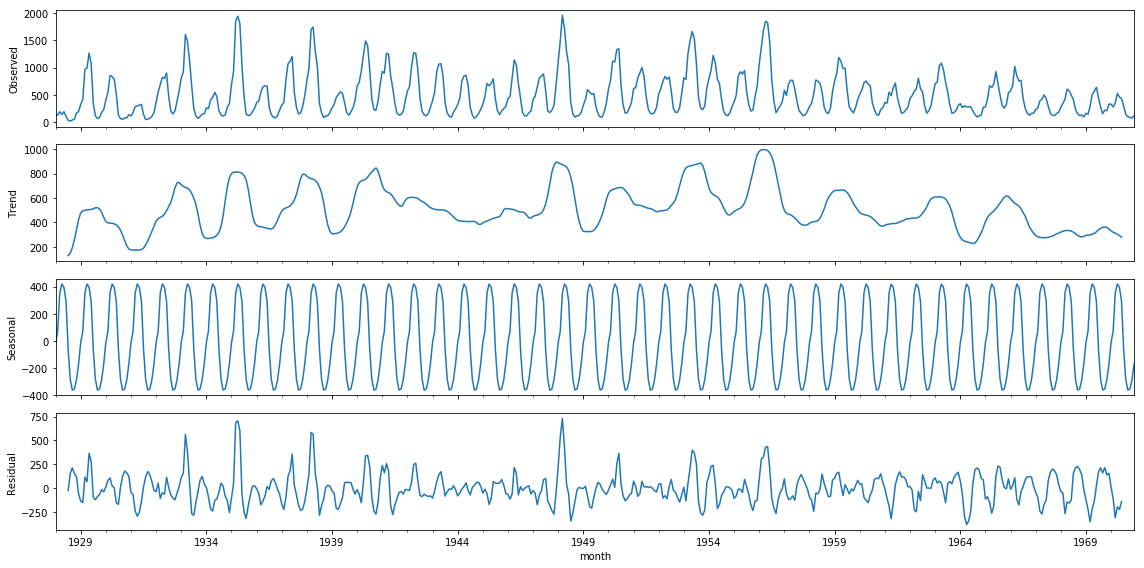

In [24]:
# quick decompose the series - this will give us a sense of the components
from statsmodels.tsa.seasonal import seasonal_decompose 

# model options = additive or multiplicative, freq parameter
result = seasonal_decompose(mumps_series, model='additive') 
result.plot()
plt.show()

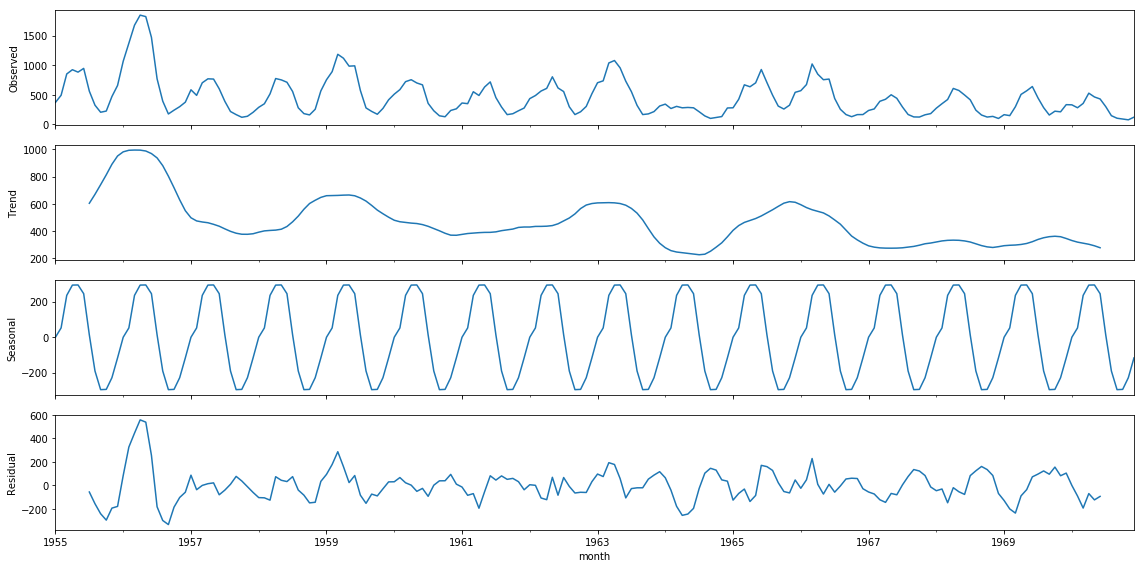

In [25]:
# what does it look like for a shorter, more recent period?
short_mumps_series = data[data.month>='1955-1-1'][['month','mumps']].set_index('month')

# model options = additive or multiplicative
result = seasonal_decompose(short_mumps_series, model='additive') 
result.plot()
plt.show()

- The 12-month seasonal component is clear but the long term trend is hard to identify
- The shorter time window (more recent) seems to show a decreasing trend - but is still not smooth

### Stationarity 
Time series modeling typically assumes that the series is stationary, a condition that is rarely met. In a stationary series:
- mean and variance do not change over time (no trend)
- autocorrelation structure does not change over time

We can apply some transformations to a series to try to make it stationary

#### Augmented Dickey-Fuller test
Based on the quick decomposition above, it's pretty clear this series is not stationary. But just in case, let's run
the Augumented Dickey-Fuller test, which tests the null hypothesis that the series has a 'unit root' which makes it non stationary

Hypothesis testing:
- Null hypothesis: there is a unit root, AKA the series is not stationary
- Alternative hypothesis: there is not a unit root, AKA the series stationary

If the pvalue is above a critical size, then we cannot reject that there is a unit root. 
- p > 0.5: accept the null hypothesis
- p <= 0.5: reject the null hypothesis

Compare the ADF statistic to the critical values when the pvalue is close. If the ADF stat is smaller (AKA more negative) than the critical values, reject the null hypothesis at the corresponding significance level.

In [26]:
# run test 
from statsmodels.tsa.stattools import adfuller
X = mumps_series.mumps # series.values
result = adfuller(X) # regression='ct' or 'ctt' ?

print('ADF Statistic: {:.3f}'.format(result[0]))
print('p-value: {:.5f}'.format(result[1]))
print('Critical Values:')

for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))

ADF Statistic: -6.590
p-value: 0.00000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


The ADF stat came back smaller than the critical values with a p-value < 0.05 
- Since our stat is less than the 1% critical value, we can reject the null hypothesis with a significance level of less than 1%
- We reject the null hypothesis - we think this series is stationary!

In [27]:
# what if we run it for the last 20 years only? 
X = mumps_series.mumps[-240:] # series.values
result = adfuller(X)

print('ADF Statistic: {:.3f}'.format(result[0]))
print('p-value: {:.5f}'.format(result[1]))
print('Critical Values:')

for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))

ADF Statistic: -3.185
p-value: 0.02088
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574


Again, we reject the null hypothsis (and assume stationarity) with a significance level of less than 5%
- This doesn't seem right - there is clearly a seasonal component to the series...

#### Moving average
A moving average can be used to smooth the time series and help identify trends. It can be used to make a prediction 1 period in the future.

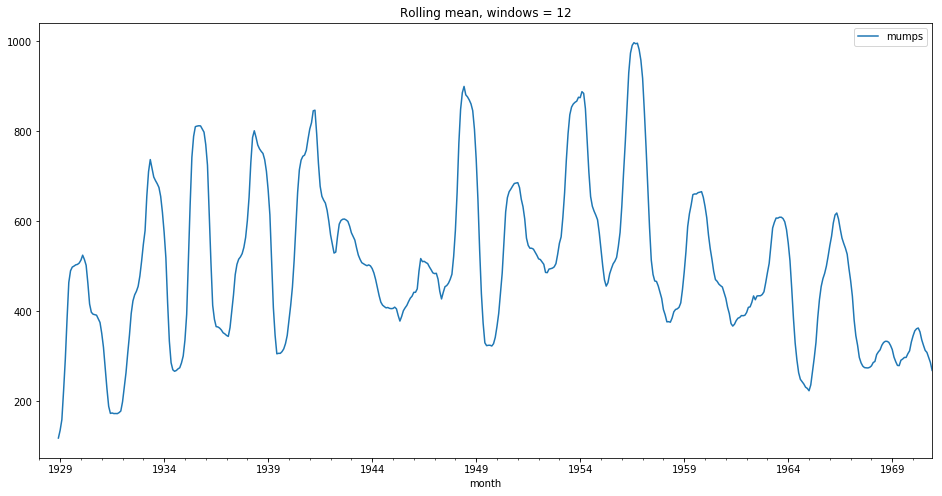

In [28]:
# 12 window moving average smoothes the yearly trends - still not very smooth
# this isn't totally unexpected - since these diseases are known to have 2-5 year cycles
# mean over time - an increasing trend until ~1958, followed by a decreasing trend
windows = 12
mumps_series.rolling(windows).mean().plot()
plt.title('Rolling mean, windows = {}'.format(windows))
plt.show()

#### Log transform
You might also apply a log transform to your series to remove an expontentially increasing trend... this doesn't really apply to our data but we will check it out anyway

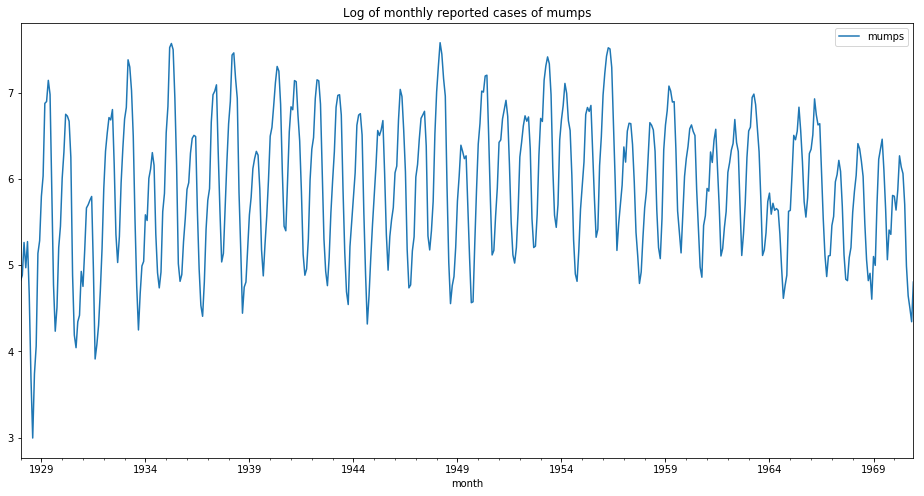

In [29]:
np.log(mumps_series).plot()
plt.title('Log of monthly reported cases of mumps')
plt.show()

#### Differencing
Differencing calculates the difference between consecutive values/observations. It can also be used to smooth a time series
- "ordinary" or "first" differences: differences at lag 1
- seasonal differences: differences taken at lag related to reasonal compontent

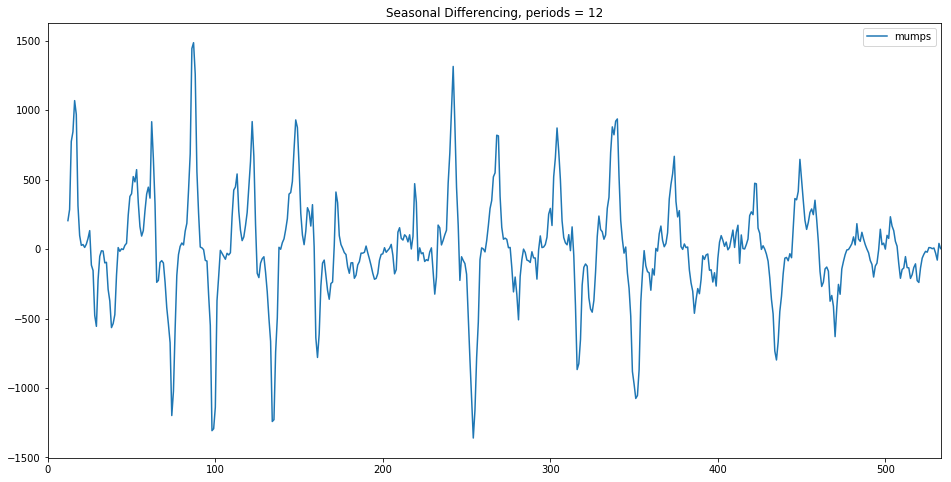

In [30]:
# seasonal differencing - ex. compare this Jan to previous Jan
periods = 12
mumps.diff(periods=periods, axis=0).plot()
plt.title('Seasonal Differencing, periods = {}'.format(periods))
plt.show()

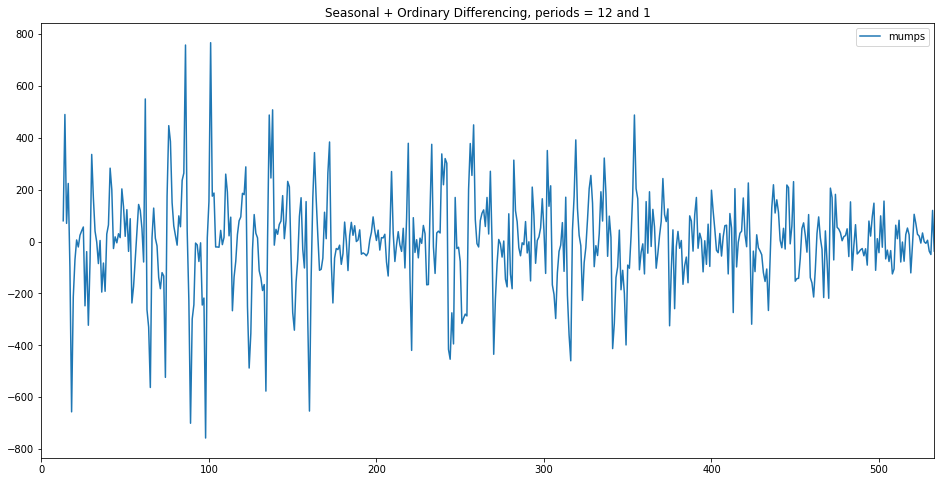

In [31]:
# sometimes you can combine ordinary and seasonal differencing
mumps.diff(periods=12, axis=0).diff(periods=1, axis=0).plot()
plt.title('Seasonal + Ordinary Differencing, periods = 12 and 1'.format(periods))
plt.show()

### Autocorrelation
Autocorrelation is a measure of how correlated a variable is with itself
- Compares lagged values of the series

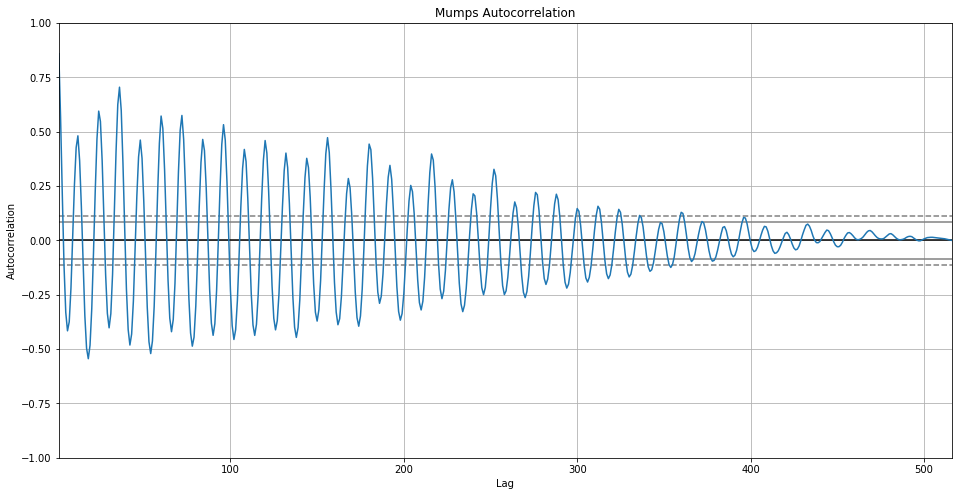

In [32]:
# check if autocorrelation is 'high' for a certain lag
#plt.figure(figsize=(12,8))
autocorrelation_plot(mumps_series)
plt.title('Mumps Autocorrelation')
plt.show()

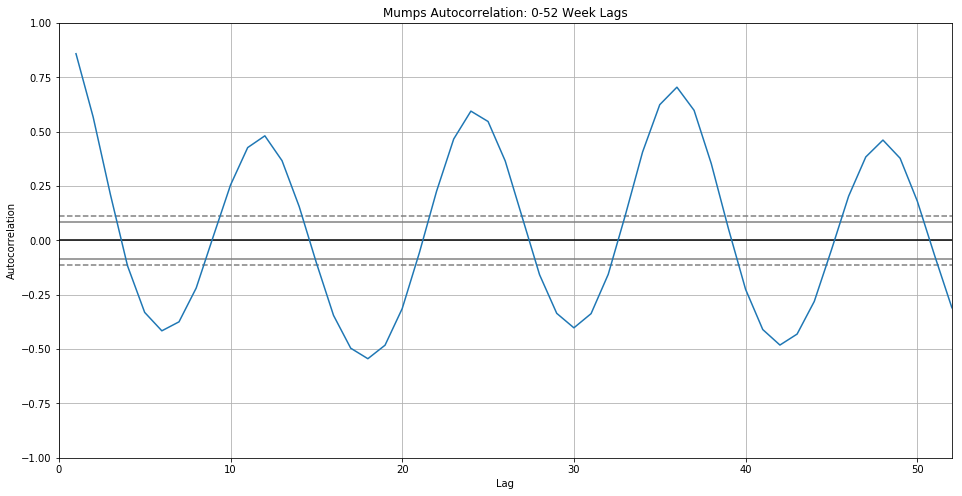

In [33]:
# check if autocorrelation for the first x lags
#plt.figure(figsize=(12,8))
autocorrelation_plot(mumps_series)
plt.title('Mumps Autocorrelation: 0-52 Week Lags')
plt.xlim(0,52)
plt.show()

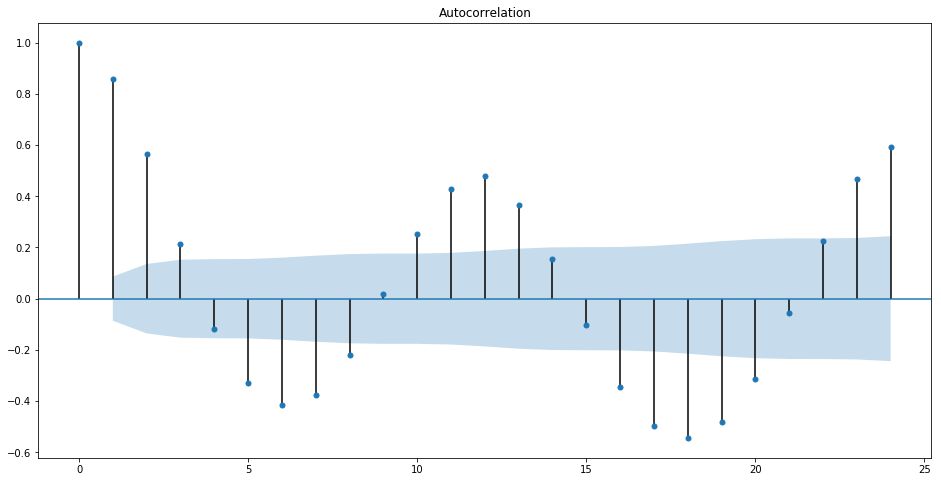

In [34]:
# try statsmodels version of autocorrelation 
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(mumps_series.values, lags=24)
plt.show()

#### Check for partial autocorrelation
Correlation at a given lag, controlling for the effect of previous lags

In [35]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

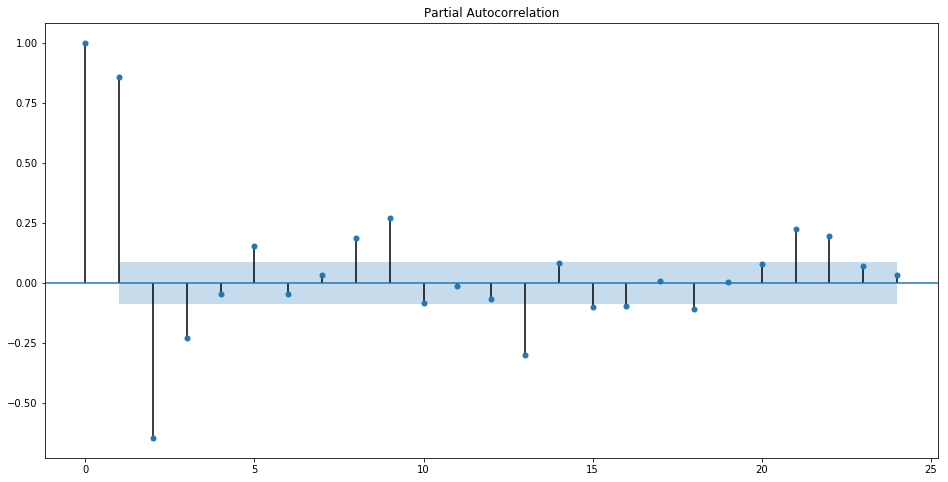

In [36]:
plot_pacf(mumps_series.values, lags=24)
plt.show()

#### Interpreting ACF / PACF
Moving average (MA) 
- The ACF plot will help us identify the order of the MA model. 
- We can find the lag (the q value) for an MA series by determining when the ACF drops off sharply. 

Autoregressive (AR) 
- The ACF will go down gradually without any sharp cut-off.
- The PACF will cut off after the degree of the AR series (the p value). 
- Example: In an AR(1) series, the partial correlation function (PACF) will drop sharply after the first lag


## Exponential smoothing 
Exponential smoothing is similar to moving average smoothing, but adds weights that exponentially decrease for older observations.


Note, 'Smoothing Factor' is a bit of a misnomer: 
- Values closer to 1 = not very smooth
- Values closer to 0 = smoother

Controls how quickly we will "forget" the last available true observation

#### Double Exponential Smoothing 
Double exponential smoothing applies a smoothing factor to the level and the trend of a series. This is controlled with the alpha and beta parameters (each is a 'smoothing factor')
- Double exponential smoothing can be used to predict 2 steps into the future

Code from: https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb

In [37]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level (level - intercept)
        beta - float [0.0, 1.0], smoothing parameter for trend (trend - slope, avg value/mean)
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [38]:
def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)
        plt.show()

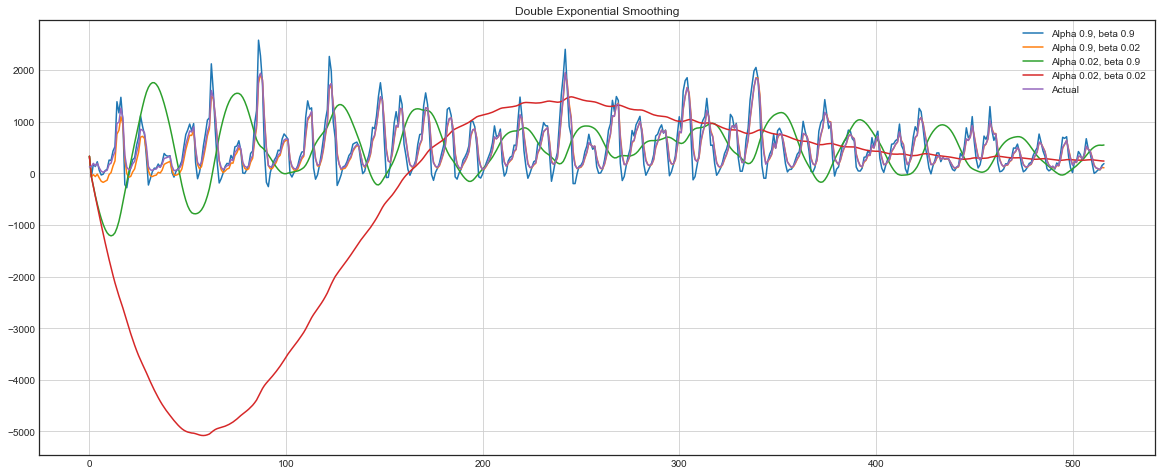

In [39]:
# plot double exp smoothing with several different values for the smoothing factors
plotDoubleExponentialSmoothing(mumps_series.mumps, alphas=[0.9, 0.02], betas=[0.9, 0.02])

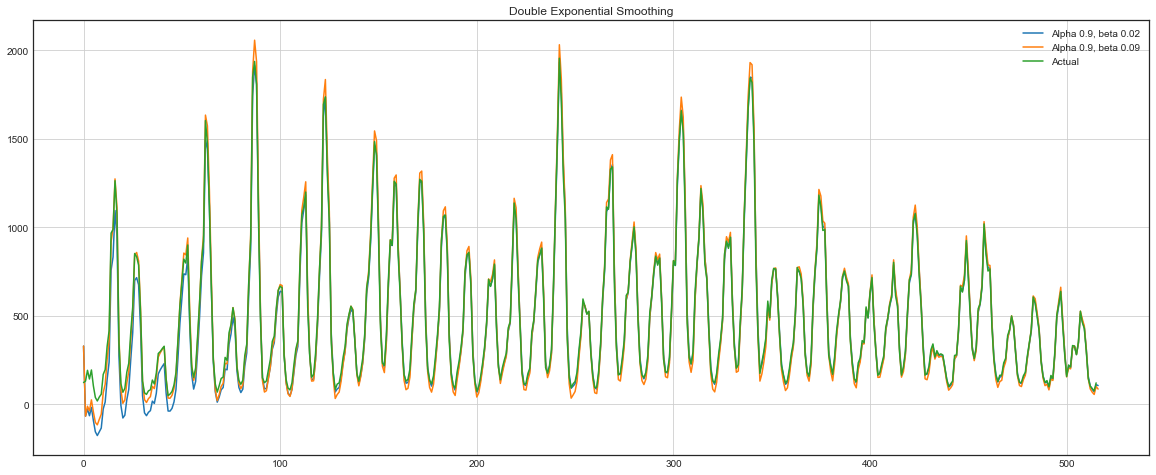

In [40]:
# plot some of the "better" parameters - 
# this seems to suggest that the value of beta has a minimal effect compared to alpha
plotDoubleExponentialSmoothing(mumps_series.mumps, alphas=[0.9], betas=[0.02,0.09])

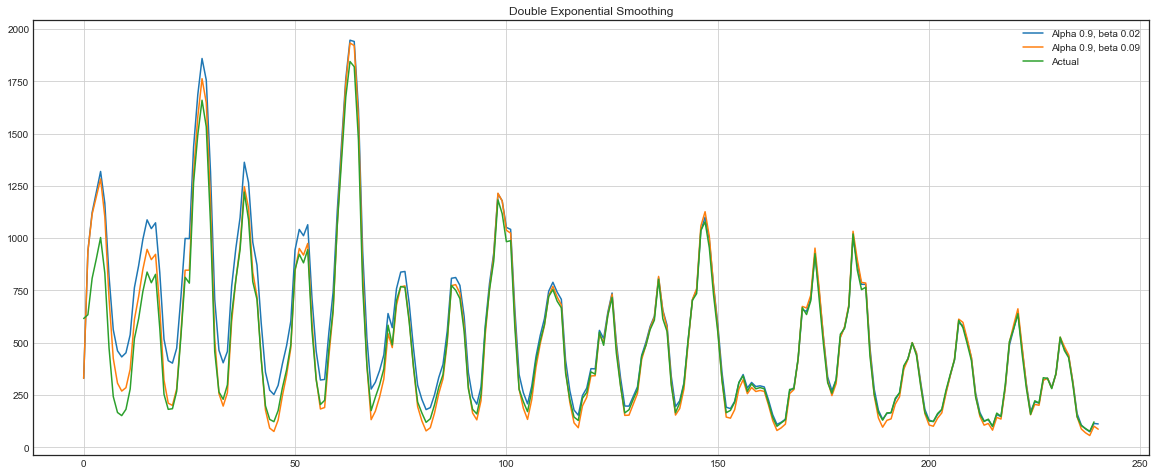

In [41]:
# zoom in on last 20 years
plotDoubleExponentialSmoothing(mumps_series.mumps[-240:], alphas=[0.9], betas=[0.02,0.09])

Next steps: apply triple exponential smoothing - can predict as many steps in the future as you like

## Conclusions and next steps

Conclusions:
- There is a clear seasonal component to this series 
- The trend over time is not clear and according the the Dickey-Fuller test does not exist

Next steps:
- Try triple expotential smoothing and ARIMA 
- Compare different forecasting techniques on "future" data (1971+ held out from analysis)

# Appendix
### To do
- Outline README
- Do we split the data set: before / after vaccines?
- Holt-Winters triple expotential smoothing / forecasting
- Box-Jenkins ARIMA forecasting
- Notebook to feed "new" data and extend / adjust predictions
- Incorporate weather data? Other data sets

### Time series resources
Triple Exponential Smoothing:
- https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb
- https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/


### Infectious diseases
#### Research / reading:
- https://en.wikipedia.org/wiki/Mumps
- https://en.wikipedia.org/wiki/Mumps_vaccine
- https://www1.nyc.gov/assets/doh/downloads/pdf/bicentennial/historical-booklet.pdf
- https://people.maths.bris.ac.uk/~magpn/Research/LSTS/STSIntro.html (features these datasets)
- Mumps SARIMA analysis: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5580627/


#### Notes on mumps:
- Before the introduction of a vaccine, mumps was a common childhood disease worldwide.
- Larger outbreaks of disease would typically occur every two to five years. 
- Children between the ages of five and nine were most commonly affected.
- In the more northerly and southerly regions of the world it is more common in the winter and spring.
- First (short-term) vaccine invented in 1948, improved vaccines became commercially available in the 1960s.

### NYC Weather data
- Data sets with weather data in same format as disease series
- Data imported and cleaned in [`mmedeiros_weather.ipynb`](https://github.com/medemel/my-dat-sf-49/blob/master/projects/04/mmedeiros_weather.ipynb)

#### Monthly average temperature

In [42]:
temp_series = pd.read_csv('temp_series.csv', header=None, names=['month','temp'])
temp_series['month'] = pd.to_datetime(temp_series.month)
temp_series = pd.Series(temp_series.set_index('month').temp)
temp_series.head()

month
1928-01-01    34.0
1928-02-01    33.0
1928-03-01    38.8
1928-04-01    48.4
1928-05-01    59.4
Name: temp, dtype: float64

In [43]:
# save the future (1971 - 1972)
temp_future = temp_series[temp_series.index >= '1971-1-1']
temp_series = temp_series[temp_series.index < '1971-1-1']
temp_series.tail()

month
1970-08-01    77.6
1970-09-01    70.8
1970-10-01    58.9
1970-11-01    48.5
1970-12-01    34.4
Name: temp, dtype: float64

#### Monthly total precipitation

In [44]:
precip_series = pd.read_csv('precip_series.csv', header=None, names=['month','precip'])
precip_series['month'] = pd.to_datetime(precip_series.month)
precip_series = pd.Series(precip_series.set_index('month').precip)
precip_series.head()

month
1928-01-01    1.87
1928-02-01    4.84
1928-03-01    2.83
1928-04-01    4.83
1928-05-01    2.07
Name: precip, dtype: float64

In [45]:
# save the future (1971 - 1972)
precip_future = precip_series[precip_series.index >= '1971-1-1']
precip_series = precip_series[precip_series.index < '1971-1-1']
precip_series.tail()

month
1970-08-01    2.47
1970-09-01    1.74
1970-10-01    2.48
1970-11-01    5.14
1970-12-01    2.82
Name: precip, dtype: float64